In [7]:
import kagglehub

path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

100%|██████████| 612M/612M [00:28<00:00, 22.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1


In [8]:
data_dir = "/root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1/Train"


In [9]:
import os
import cv2
import numpy as np

data_dir = "/root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1/Train"

X = []
y = []

# Loop over each subfolder (each folder represents a class)
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)

    # Make sure it's a directory
    if not os.path.isdir(folder_path):
        continue

    for img_file in os.listdir(folder_path):
        if img_file.endswith(('.jpg', '.png', '.ppm')):
            img_path = os.path.join(folder_path, img_file)

            # Read and resize the image
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))
            img = img / 255.0  # Normalize pixel values

            X.append(img)
            y.append(int(folder))  # Class label from folder name

# Convert to NumPy arrays
X = np.array(X, dtype='float32')
y = np.array(y)

print(" Number of images:", len(X))
print(" Shape of each image:", X[0].shape)
print(" Unique classes:", np.unique(y))


 Number of images: 39209
 Shape of each image: (64, 64, 3)
 Unique classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


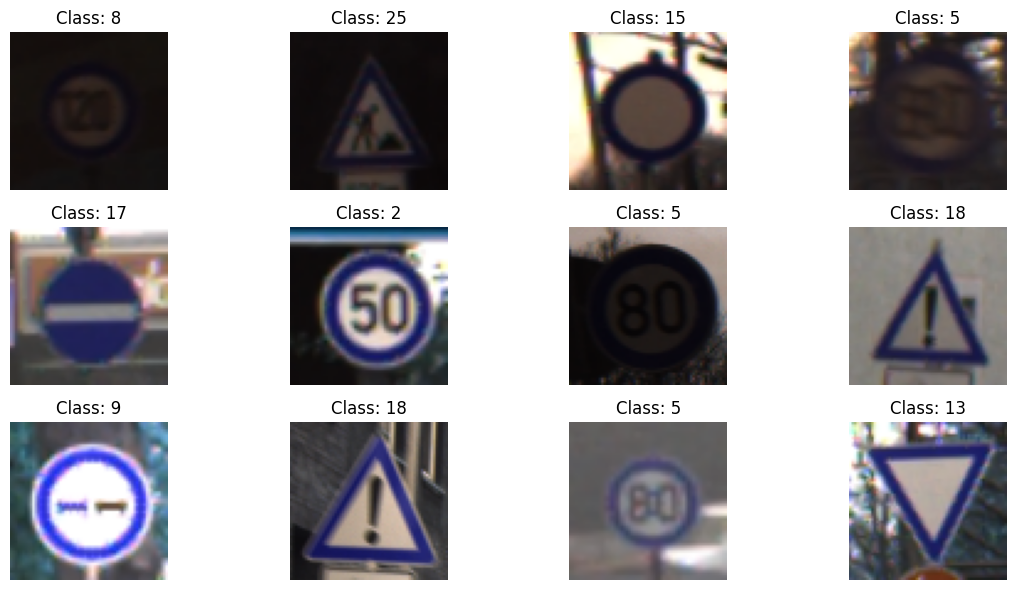

In [10]:
import matplotlib.pyplot as plt
import random

num_images = 12
indices = random.sample(range(len(X)), num_images)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(indices):
    plt.subplot(3, 4, i+1)
    plt.imshow(X[idx])
    plt.title(f"Class: {y[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Number of classes (from 0 to 42)
num_classes = len(np.unique(y))

# Convert labels to One-Hot Encoding
y_cat = to_categorical(y, num_classes)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42, stratify=y
)

print(" Training data shape:", X_train.shape, y_train.shape)
print(" Test data shape:", X_test.shape, y_test.shape)


 Training data shape: (31367, 64, 64, 3) (31367, 43)
 Test data shape: (7842, 64, 64, 3) (7842, 43)


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False
)
datagen.fit(X_train)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [15]:
num_of_categories = 43

model = Sequential()

model.add(Input(shape=(64,64,3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_of_categories, activation='softmax'))

In [16]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 688,747 (2.63 MB)

 Trainable params: 688,747 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


981/981 ━━━━━━━━━━━━━━━━━━━━ 49s 45ms/step - accuracy: 0.2040 - loss: 2.9097 - val_accuracy: 0.5414 - val_loss: 1.3507
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.4811 - loss: 1.5641 - val_accuracy: 0.7923 - val_loss: 0.6720
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.6441 - loss: 1.0615 - val_accuracy: 0.9058 - val_loss: 0.2961
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.7558 - loss: 0.7242 - val_accuracy: 0.9630 - val_loss: 0.1437
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.8204 - loss: 0.5424 - val_accuracy: 0.9713 - val_loss: 0.0953
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.8579 - loss: 0.4234 - val_accuracy: 0.9828 - val_loss: 0.0716
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.8858 - loss: 0.3435 - val_accuracy: 0.9888 - val_loss: 0.0383
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.8995 - loss: 0.2983 - val_accurac

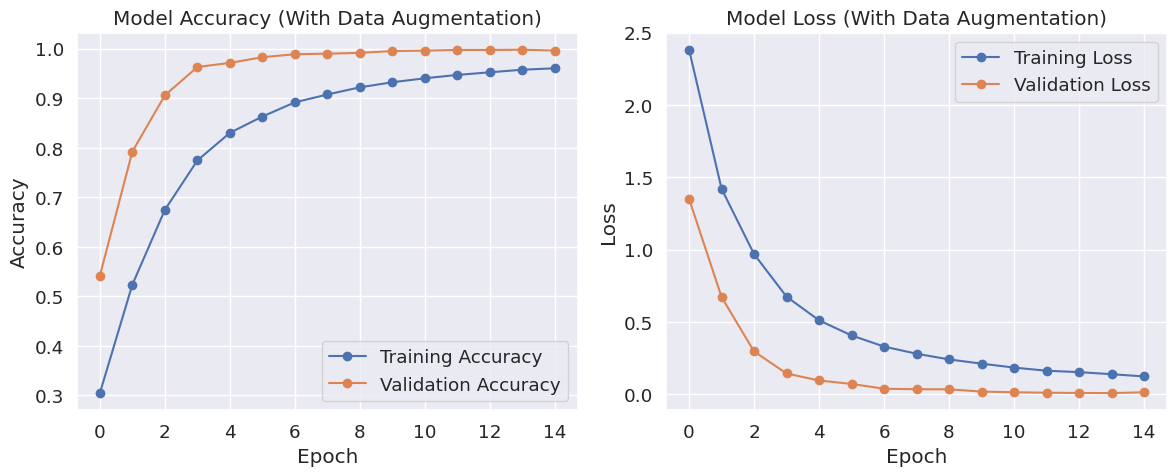

In [20]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=15,
    verbose=1
)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy (With Data Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss (With Data Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


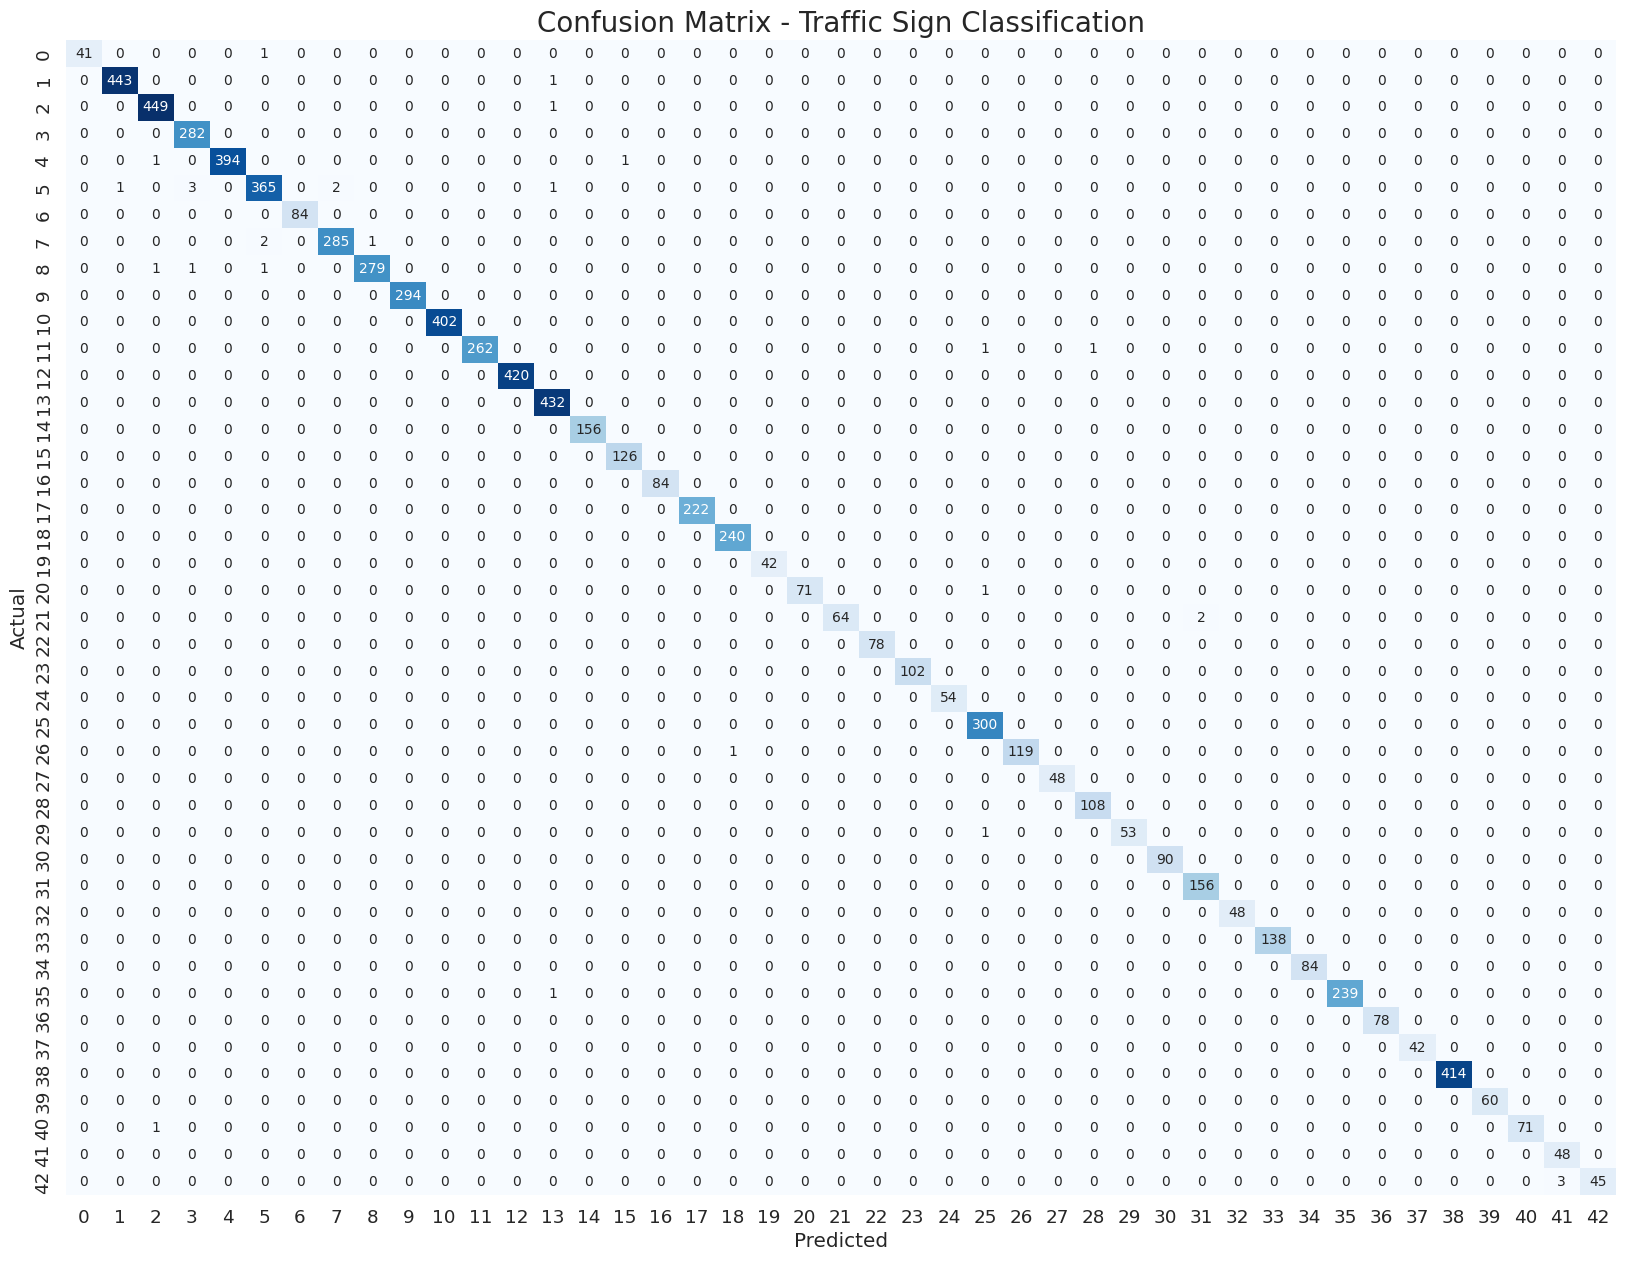

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

cm_data = confusion_matrix(y_true_labels, y_pred_labels)

CLASS_LABELS = [str(i) for i in range(43)]

cm_df = pd.DataFrame(cm_data, columns=CLASS_LABELS, index=CLASS_LABELS)
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'

plt.figure(figsize=(20, 15))
plt.title('Confusion Matrix - Traffic Sign Classification', fontsize=20)
sns.set(font_scale=1.2)
sns.heatmap(cm_df, cbar=False, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 10})
plt.show()